# Digits MNIST Multiclass image classification

With the Convolutional Neural Network made by Abel Garcia

## EDA (exploratory data analysis) and preprocessing

This dataset contains 70.000 images of 10 different classes, corresponding to digits between 0 and 9 (inclusive).

In [2]:
from ConvNetAbel import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import math as math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,  precision_score, recall_score, roc_curve,roc_auc_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

from timeit import default_timer as timer

%matplotlib notebook

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../csv/digits mnist/data.csv')

y = dataset['label'].values

X = dataset.drop("label", axis="columns").to_numpy()

print(dataset.values.shape)

dataset.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,...,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Showing images

In [5]:
def showImg(i, label, imgset):
    size = int(math.sqrt(imgset[i].shape[0]))
    sample = np.reshape(imgset[i], (size,size))
    print(sample.shape)
    plt.figure()
    plt.title(label)
    plt.imshow(sample, 'gray')

### Data normalization

In [8]:
X = (X - X.mean()) / X.std()

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

In [9]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

dicClases = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9'}

(21000, 784) (21000, 1)
(21000, 784) (21000, 1)


(28, 28)


<IPython.core.display.Javascript object>


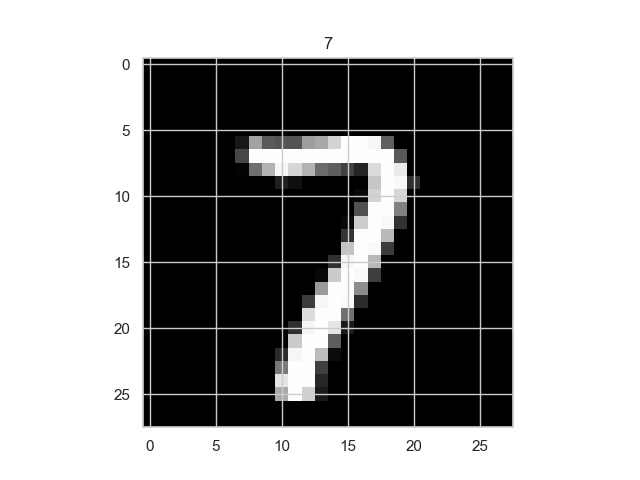

(28, 28)


<IPython.core.display.Javascript object>


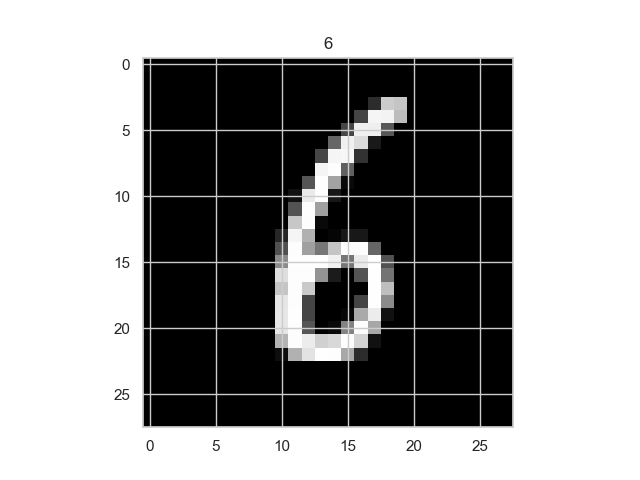

In [10]:
showImg(10, dicClases[y_train[10][0]], x_train)
showImg(11, dicClases[y_train[11][0]], x_train)

### Countplot:

Number of images of each class.

<IPython.core.display.Javascript object>


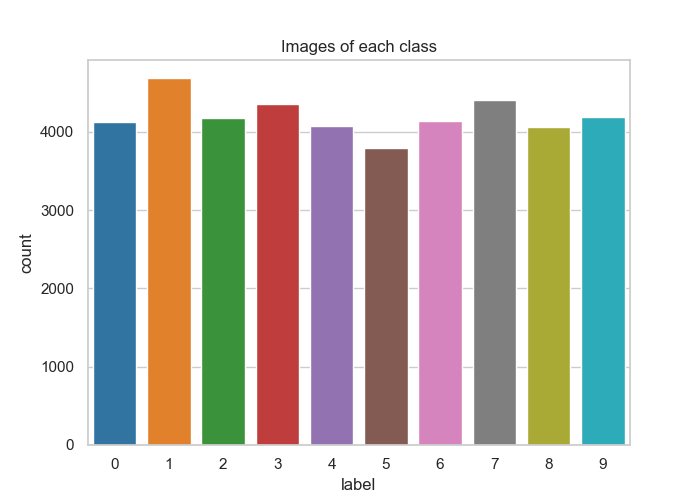

In [12]:
plt.figure(figsize=(7,5))
plt.title('Images of each class')
sns.countplot(x='label', data=dataset)

# Classification

Preparing y_train with FC output shape:

In [13]:
y_train = y_train.reshape(y_train.shape[0], 1)
y_train_multiclass = np.zeros((y_train.shape[0], len(dicClases.items())), dtype=int)

print(y_train_multiclass.shape)

for i, yv in enumerate(y_train):
    y_train_multiclass[i][yv] = 1
    
print(y_train[0:2])

print(y_train_multiclass[0:2])

print(y_train_multiclass.shape)

(21000, 10)
[[0]
 [2]]
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
(21000, 10)


Change input data to 2D shape to apply convolutions:

In [14]:
def oneToTwo(imgs):
    
    size = int(math.sqrt(imgs.shape[1]))
    
    output = np.zeros((imgs.shape[0], size, size))
    
    for i,im in enumerate(imgs):
        output[i] = np.reshape(imgs[i], (size,size))
        
    return output

In [15]:
print(x_train.shape, x_test.shape)

x_train = oneToTwo(x_train)
x_test = oneToTwo(x_test)

print(x_train.shape, x_test.shape)

(21000, 784) (21000, 784)
(21000, 28, 28) (21000, 28, 28)


Train the model:

In [43]:
trainModel = True
exportModel = False

mpath = 'exportedModels/'
mfilename = 'digitsMNIST_CNN'

In [32]:
if trainModel:
    
    clf = ConvNetAbel(nEpochs=15, convFilters=[64, 64], convStride=[2, 2], convFilterSizes=3,
                      hidden=[100], learningRate=1.2, debugLevel=2, softmax=False,
                      showLogs=False, activationFunction='relu', learningRateConv=1.1,
                      convEpochs=5, verbose=True, rangeRandomWeight=None, pre_norm=True,
                      kernel_initializer='he_uniform', batch_size=1, iterationDrop=0.8)

    start = timer()
    clf.fit(x_train[0:, :, :], y_train_multiclass[0:, :])
    end = timer()
    print('Time in seconds: ', end - start)
    
else:
    
    clf = ConvNetAbel()
    clf.importModel(mpath, mfilename)

Training started with 21000 samples

Epoch 1/15 completed
--- Epoch loss: 0.0155

Epoch 2/15 completed
--- Epoch loss: 0.0078

Epoch 3/15 completed
--- Epoch loss: 0.0059

Epoch 4/15 completed
--- Epoch loss: 0.005

Epoch 5/15 completed
--- Epoch loss: 0.0042

Epoch 6/15 completed
--- Epoch loss: 0.0026

Epoch 7/15 completed
--- Epoch loss: 0.0016

Epoch 8/15 completed
--- Epoch loss: 0.0012

Epoch 9/15 completed
--- Epoch loss: 0.0007

Epoch 10/15 completed
--- Epoch loss: 0.0004

Epoch 11/15 completed
--- Epoch loss: 0.0001

Epoch 12/15 completed
--- Epoch loss: 0.0001

Epoch 13/15 completed
--- Epoch loss: 0.0

Epoch 14/15 completed
--- Epoch loss: 0.0

Epoch 15/15 completed
--- Epoch loss: 0.0


Training finished


Time in seconds:  1554.0756766000002


In [44]:
if exportModel:
    clf.exportModel(mpath, mfilename)

Predict probabilities of test dataset:

In [36]:
probabs = clf.predict_proba(x_test)

In [37]:
print(probabs.shape)
probabs_results = np.argmax(probabs, axis=1)

(21000, 10)


## Confusion matrix of classification

<IPython.core.display.Javascript object>


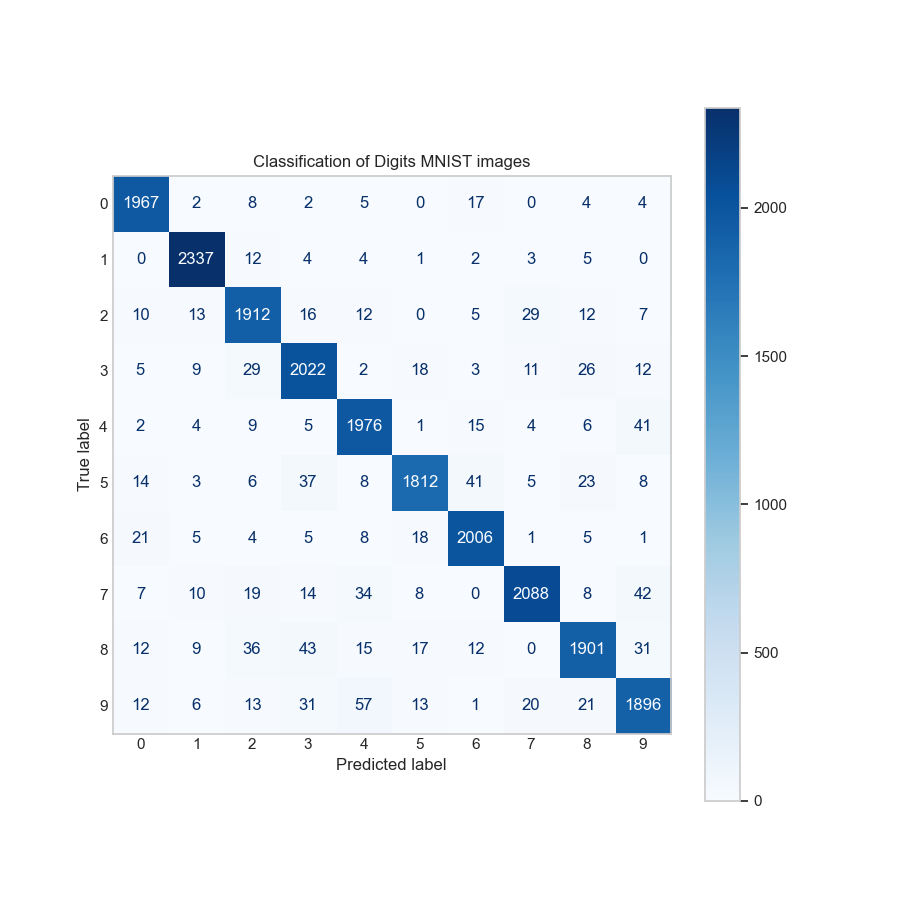

In [38]:
fig, ax = plt.subplots(figsize=(9,9))

cmMT = confusion_matrix(y_test[:, 0], probabs_results, normalize=None)
cmd = ConfusionMatrixDisplay(cmMT, display_labels=dicClases.values())
cmd = cmd.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation='horizontal')

plt.title("Classification of Digits MNIST images")
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)
plt.show()

## Accuracy score

In [39]:
def accuracy_multiclass(cmMT, y_test, probabs_results, dicClases=None):
    acc = accuracy_score(y_test, probabs_results)
    print('Overall accuracy:', acc, '\n')

    acc_c = cmMT.diagonal()/cmMT.sum(axis=1)
    for ic,acc_clase in enumerate(acc_c):
        className = str(ic)
        
        if dicClases is not None:
            className = str(dicClases[ic])
        
        print('Accuracy of class ' + className + ':', round(acc_clase,3))



accuracy_multiclass(cmMT, y_test, probabs_results, dicClases)

Overall accuracy: 0.9484285714285714 

Accuracy of class 0: 0.979
Accuracy of class 1: 0.987
Accuracy of class 2: 0.948
Accuracy of class 3: 0.946
Accuracy of class 4: 0.958
Accuracy of class 5: 0.926
Accuracy of class 6: 0.967
Accuracy of class 7: 0.936
Accuracy of class 8: 0.916
Accuracy of class 9: 0.916


## Plots

<IPython.core.display.Javascript object>


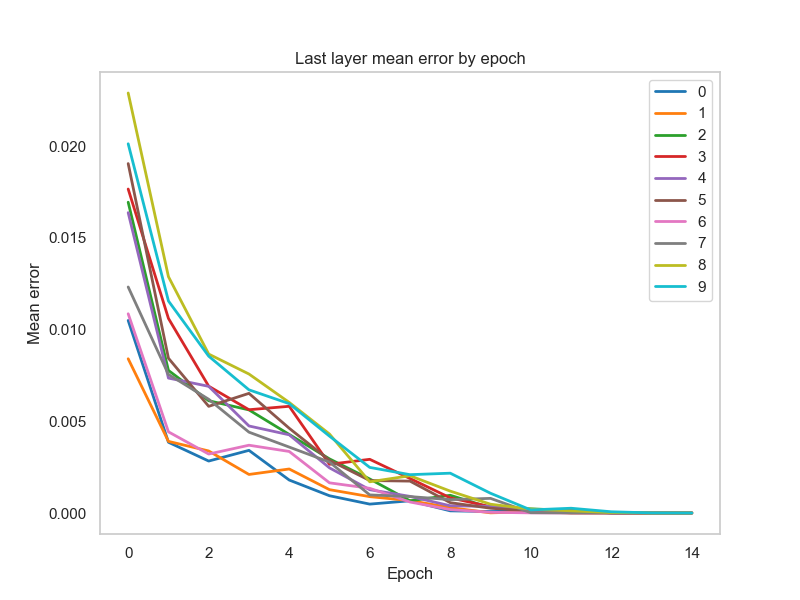

In [40]:
clf.plot_mean_error_last_layer(dicClases.values(), byClass=True)

<IPython.core.display.Javascript object>


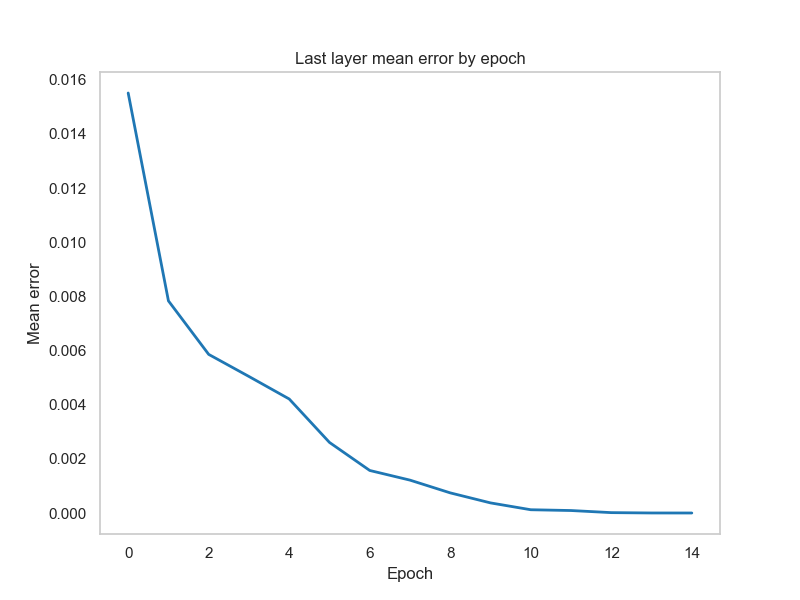

In [41]:
clf.plot_mean_error_last_layer(dicClases.values(), byClass=False)